# BCDI Pipeline
### A notebook to run the `BcdiPipeline` instance

Import packages:

In [1]:
import os
import cdiutils

#### The main parameters

In [ ]:
beamline_setup =
sample_name =
scan =
experiment_file_path =

# Choose where you wish to save the data, or leave it as it is:
dump_dir = os.getcwd() + f"/results/{sample_name}/S{scan}/"

preprocess_shape = [100, 150, 150]  # 2 or 3 values. If 2, will take the whole RC 

# voxel_reference_methods is required and CAN BE A LIST (as long as
# you like) of either "com", "max" or a tuple of int that corresponds to
# the position you want to crop the data at (possibly 2D).
# Ex: det_reference_voxel_method = [(70, 200, 200), "com", "com"]. This
# will center a box of size preprocess_shape around voxel
# (70, 200, 200) and compute the com, recentre the box around this com,
# recompute the com (that might have changed) and recentre again.
# Particularly useful if you have aliens (com fails) or hot pixels
# (max fails), chain centring can help you find the correct com or max.
voxel_reference_methods = ["max", "com", "com"]

rocking_angle_binning = None  # Whether you want to bin in the RC direction
light_loading = False  # Load only the roi of the data defined by the voxel_reference_methods and preprocess_output_shape
hot_pixel_filter = False
background_level = None

# Load the parameters and parse them into the BcdiPipeline class instance 
params = cdiutils.pipeline.get_params_from_variables(dir(), globals())
bcdi_pipeline = cdiutils.BcdiPipeline(params=params)

[INFO] BcdiPipeline initialised.



Dump directory already exists, results will be saved in:
/gpfs/jazzy/data/scisoft/clatlan/dev/cdiutils/results/test1_BCDI_0027/S3/.


## Pre-processing

If you need to update some parameters, you can do it directly by parsing them in the `preprocess` method such as:
```
bcdi_pipeline.preprocess(
    preprocess_shape=()
    voxel_reference_methods=(80, 150, 230)
)
```

[INFO] 
*******************************************************************************
*                        Starting process: preprocess                         *
*******************************************************************************

[INFO] 
PyNX needs even input dimensions, requested shape [160, 230, 201] will be
cropped to (160, 230, 200).

[INFO] 
Detector name automatically found ('mpxgaas').

[INFO] Raw detector data shape is: (516, 516).
[INFO] Energy successfully loaded (13000.001697195401 eV).
[INFO] 
det_calib_params not provided, will try to find them. However, for a more accurate calculation, you'd better provide them.
[INFO] The preprocessing output shape is: and (160, 230, 200) will be used for determining the ROI dimensions.
[INFO] Method(s) employed for the voxel reference determination are [(80, 151, 114)].
[INFO] 
Chain centring:
	- (80, 151, 114): (80, 151, 114), value: 99515

[INFO] The reference voxel was found at (80, 151, 114) in the uncropped data 

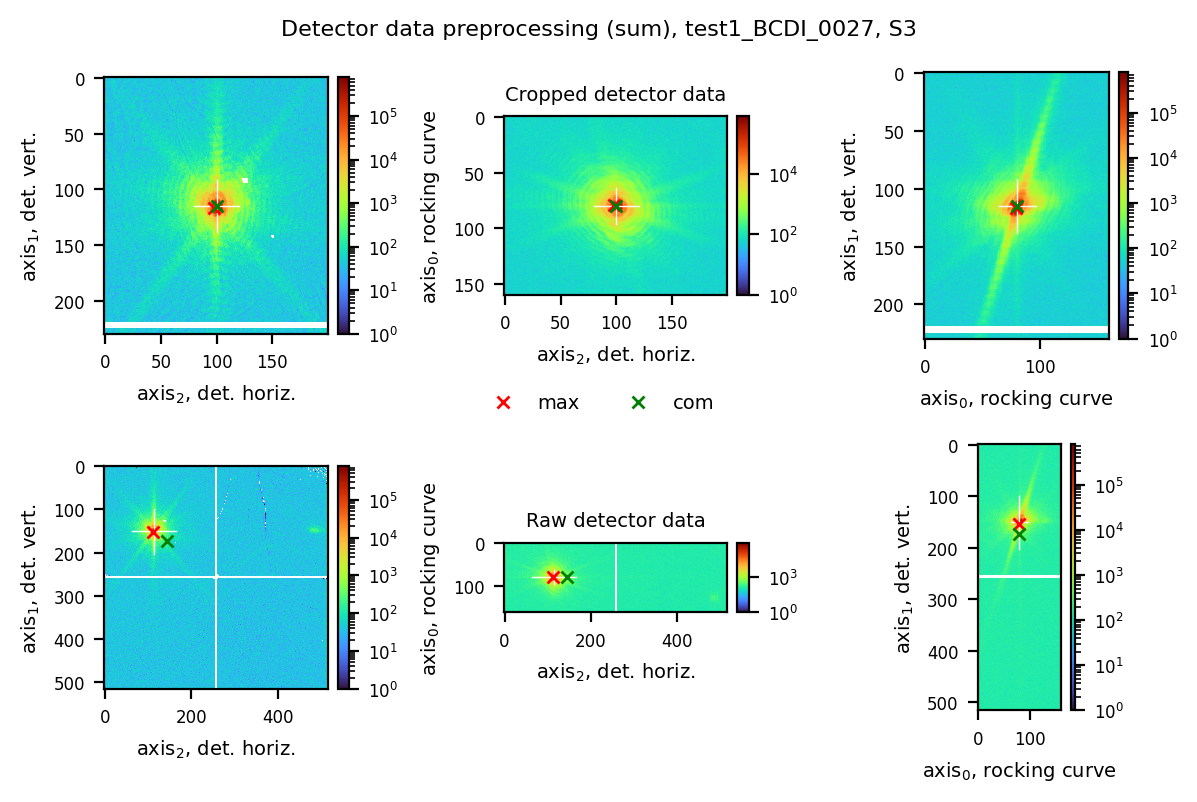

In [ ]:
bcdi_pipeline.preprocess()

## [PyNX](https://pynx.esrf.fr/en/latest/index.html) phase retrieval
See [pynx.cdi](https://pynx.esrf.fr/en/latest/modules/cdi/index.html) for documentation on the phasing algorithms used here.

Here are a few default PyNX parameters used in cdiutils:
* `support = auto`
* `support_threshold = 0.15, 0.40`
* `support_update_period = 20`
* `support_only_shrink = False`
* `support_post_expand = None`
* `nb_raar = 500`
* `nb_hio =  300`
* `nb_er =  200`
* `nb_run = 20`
* `nb_run_keep = 5`
* `rebin = 1, 1, 1`
* `positivity = False`

Note that parsing them in the `phase_retrieval` method will update them:
```
bcdi_pipeline.phase_retrieval(nb_RAAR=400)
```

In [4]:
bcdi_pipeline.phase_retrieval(
    jump_to_cluster=False,
    clear_former_results=True,
    nb_RAAR=400
)

[INFO] 
*******************************************************************************
*                      Starting process: phase_retrieval                      *
*******************************************************************************

[INFO] Removing former results.

[INFO] Assuming the current machine is running PyNX. Will run the provided command.
[INFO] No command provided. Will use the default.
[INFO] Using parameters file:  pynx-cdi-inputs.txt
[INFO] WARNING: missing parameter in self.params: roi
[INFO] Loading data:  /gpfs/jazzy/data/scisoft/clatlan/dev/cdiutils/results/test1_BCDI_0027/S3//pynx_phasing/S3_pynx_input_data.npz
[INFO] Finished loading iobs data, with size: 7360000
[INFO] Data CXI file already exists, not overwriting:  S3_pynx_input_data.cxi
[INFO] CDI runner: preparing processing unit
[INFO] Computing speed for available CUDA GPU [ranking by global memory bandwidth]:
[INFO] NVIDIA L40S:   44 Gb,   626 Gbytes/s
[INFO] Using CUDA GPU: NVIDIA L40S
[INFO] 

### Analyse the phasing results

[INFO] Computing metrics...
[INFO] the sorted list of runs using sorting_criterion 'mean_to_max' is:
['06', '09', '04', '20', '05']
[INFO] Plotting phasing results...


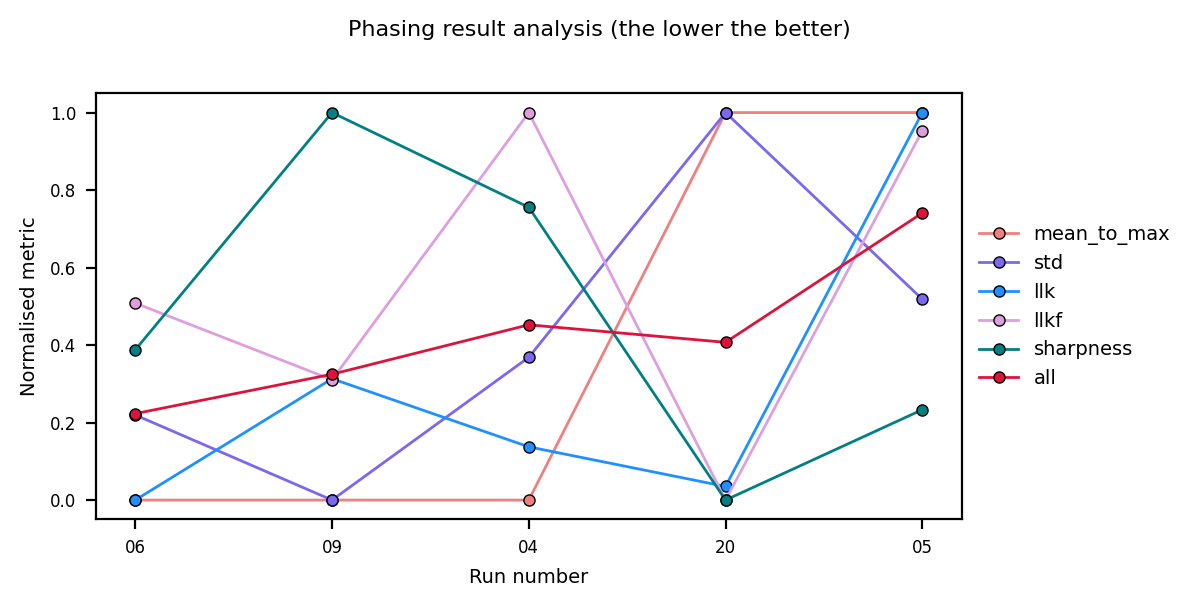

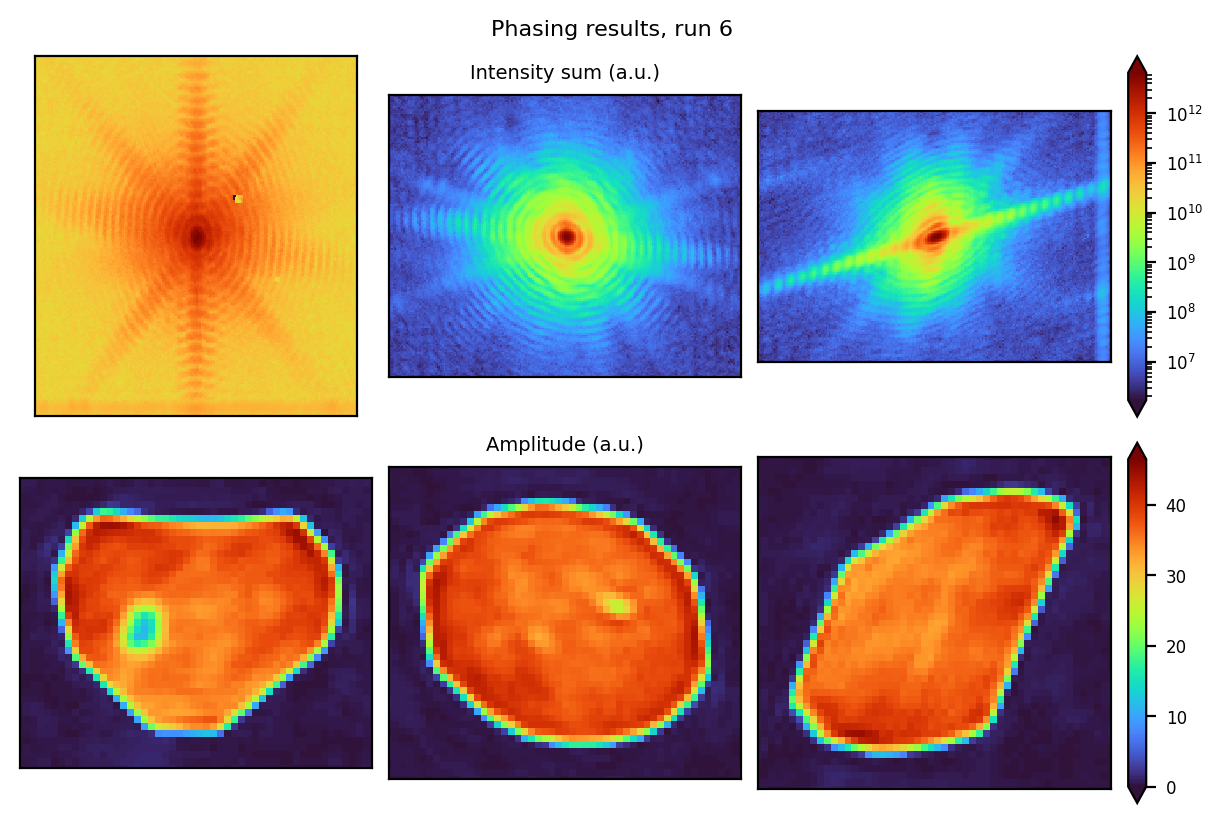

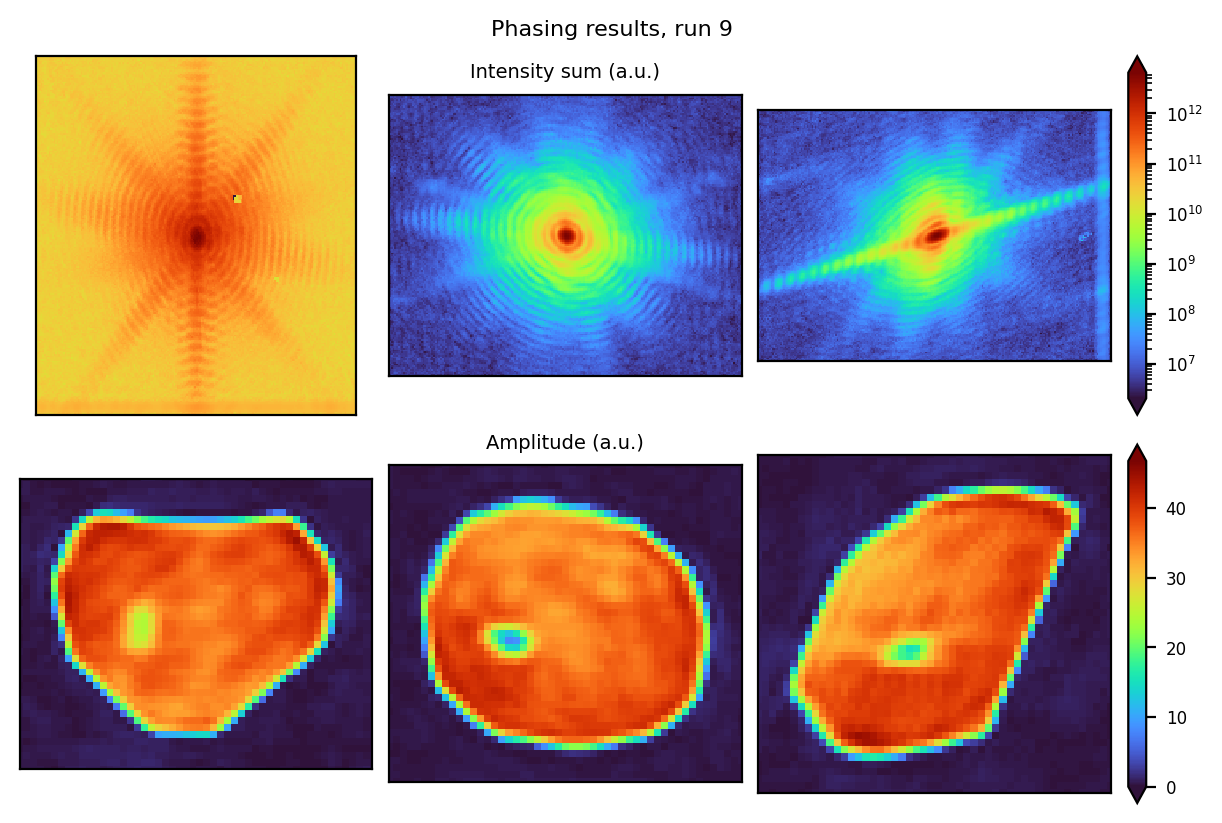

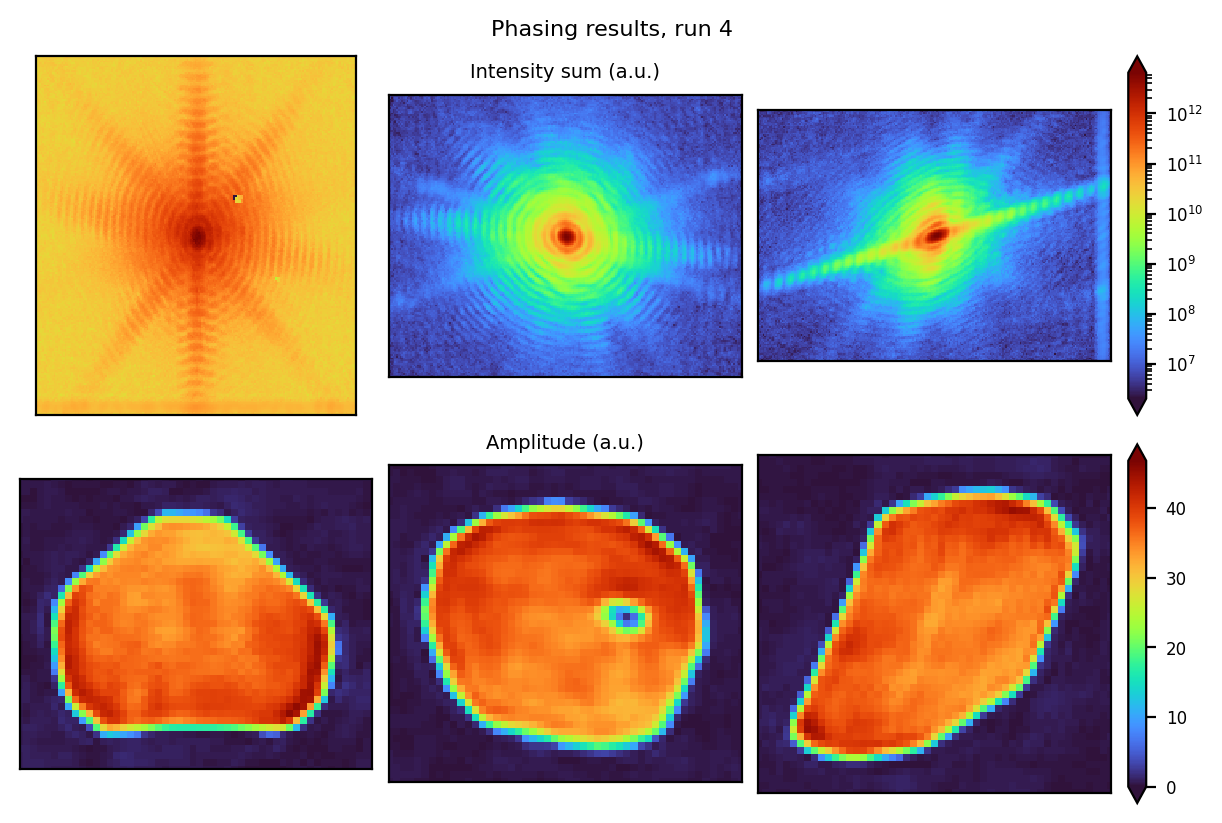

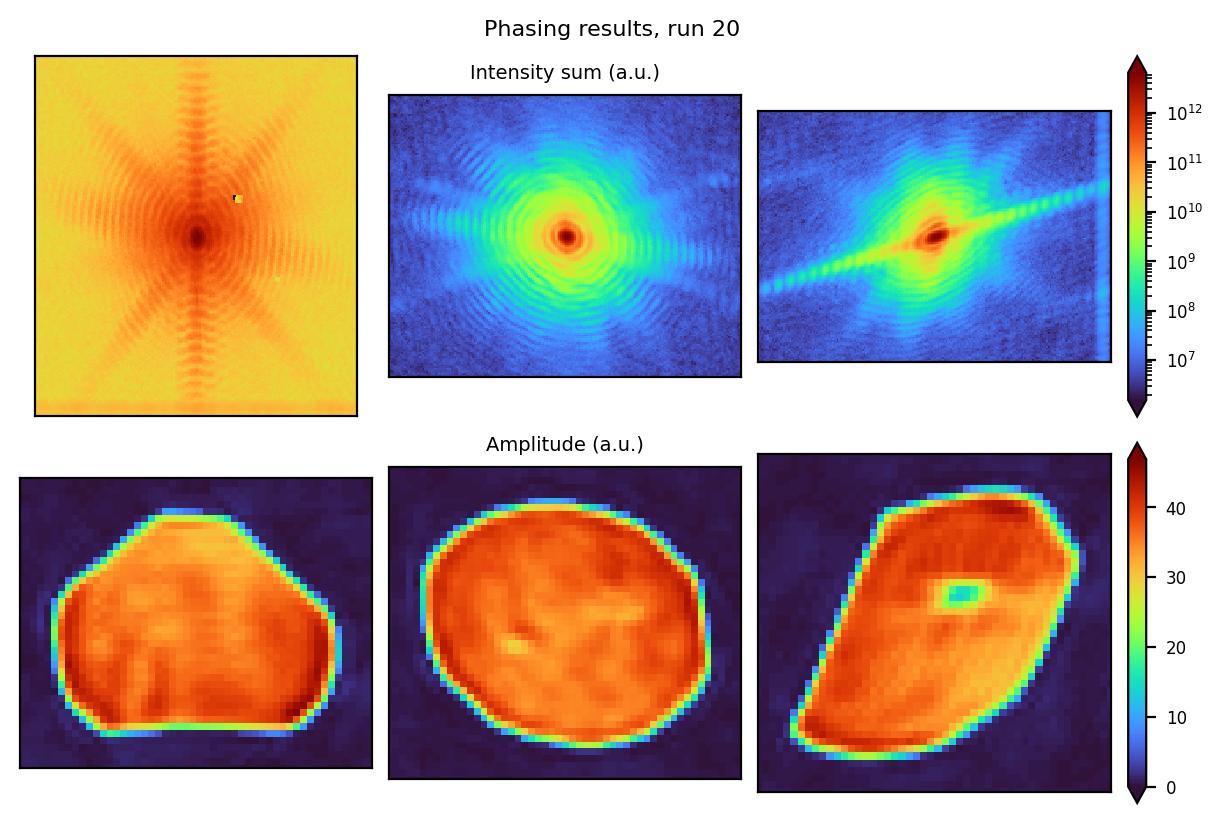

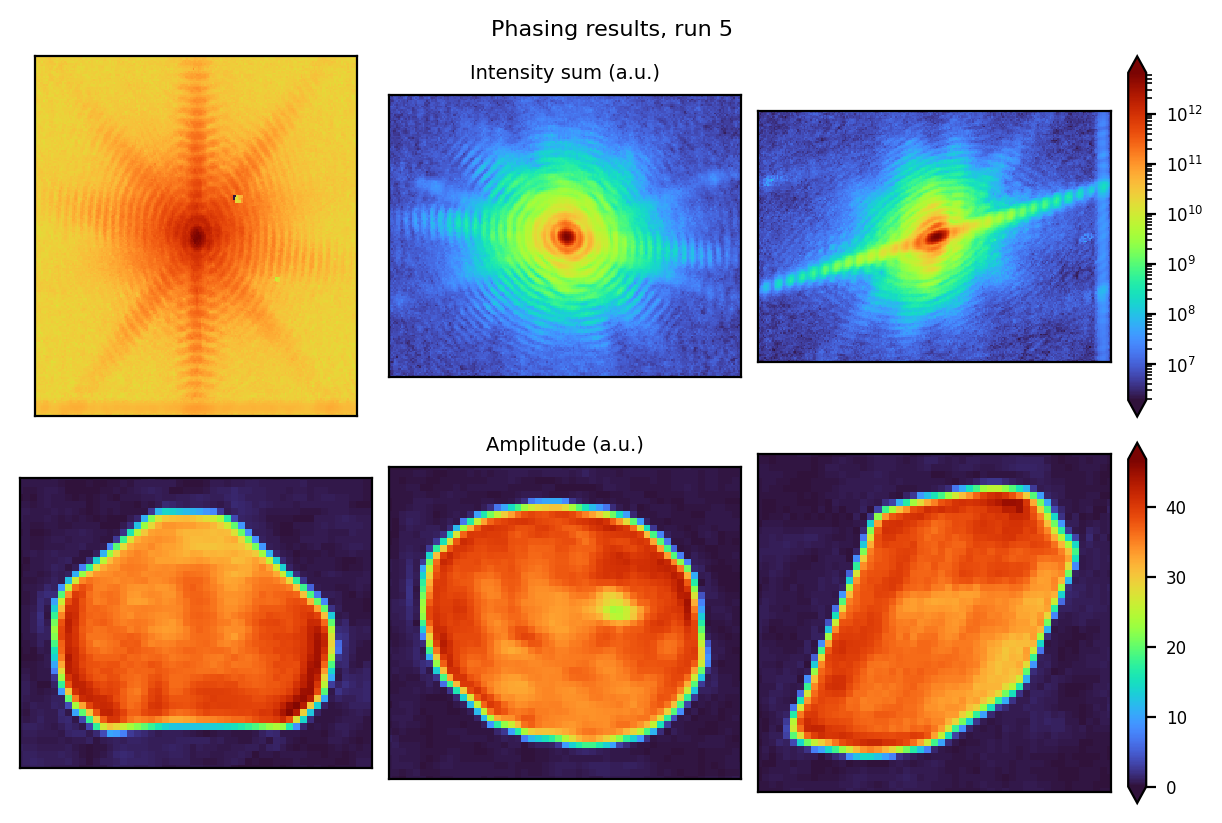

In [5]:
bcdi_pipeline.analyse_phasing_results(
    sorting_criterion="mean_to_max",
    # plot_phasing_results=False,  # Defaults to True
    # plot_phase=True,  # Defaults to False
)

### Selection of the best reconstructions and mode decomposition

In [6]:
# Chose the number of best candidates you want to keep.
number_of_best_candidates: int = 5

# You can either select the best candidates by specifying the
# reconstruction number or just provide the number of runs you
# want to consider. The "best" runs are selected according to the
# sorting_criterion above. 
bcdi_pipeline.select_best_candidates(
    # best_runs=[10]
    nb_of_best_sorted_runs=number_of_best_candidates
)

bcdi_pipeline.mode_decomposition()

[INFO] Best candidates selected:
['06', '09', '04', '20', '05']


[INFO] 
*******************************************************************************
*                    Starting process: mode_decomposition                     *
*******************************************************************************

[INFO] PyNX is not installed on the current machine. Will try to run the provided command instead.
[INFO] No command provided will use the default.


[INFO] Importing data files
[INFO] Loading 5 files in // [32 proc]
[INFO] Loading: candidate_1-5_S3_run_06.cxi
[INFO] Loading: candidate_2-5_S3_run_09.cxi
[INFO] Loading: candidate_3-5_S3_run_04.cxi
[INFO] Loading: candidate_4-5_S3_run_20.cxi
[INFO] Loading: candidate_5-5_S3_run_05.cxi
[INFO] Calculating modes from the imported objects
[INFO] Matching arrays against the first one [candidate_4-5_S3_run_20.cxi] - this may take a while
[INFO] Matching 5 arrays in // [32 proc]
[INFO] R_match(1) =  8.120%
[INFO] R_match(2) =  6.796%
[INFO] R_match(3) =  9.039%
[INFO] R_match(4) = 10.032%
[INFO] Elapsed time:    3.1s
[INFO] Analysing modes
[INFO] First mode represents 99.646%
[INFO] Saving modes analysis to: mode.h5
[ERROR] Loading pynx/2024.1
[ERROR] Loading requirement: mamba/24.3.0-0 cuda/12.3.1
[INFO] Process mode_decomposition completed successfully.


## Post-processing:
This part includes:
* orthogonalisation,
* phase manipulation such as phase unwrapping, phase ramp removal etc.
* compute the displacement field, strain, dspacing...
* plot a bunch of figures

[INFO] 
*******************************************************************************
*                        Starting process: postprocess                        *
*******************************************************************************

[INFO] Additional parameters provided, will update the current parameter dictionary.
[INFO] The oversampling ratios in each direction (original frame) are axis0: 4.3, axis1: 5.6, axis2: 4.9
[WARNING] Shapes before (160, 230, 200) and after (160, 224, 200) Phase Retrieval are different.
Check out PyNX parameters (ex.: auto_center_resize).
[INFO] 
Reinitialising the direct space interpolator

[INFO] Voxel size finally used is: (10, 10, 10) nm in the CXI convention.
[INFO] Apodizing the complex array using blackman filter.
[INFO] Finding an isosurface estimate based on the reconstructed Bragg electron density histogram:
[INFO] Isosurface estimated at 0.6168284936979018.
[INFO] Isosurface provided by user will be used: 0.45.
[INFO] Computing the

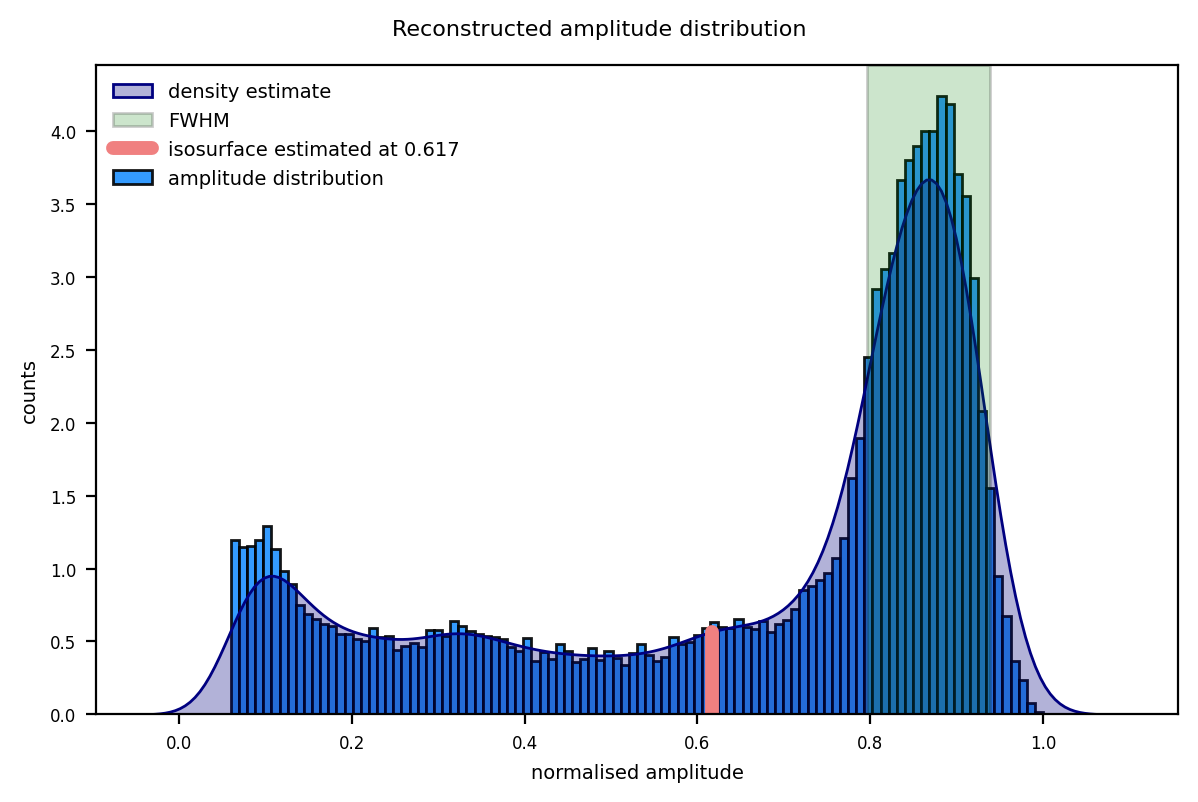

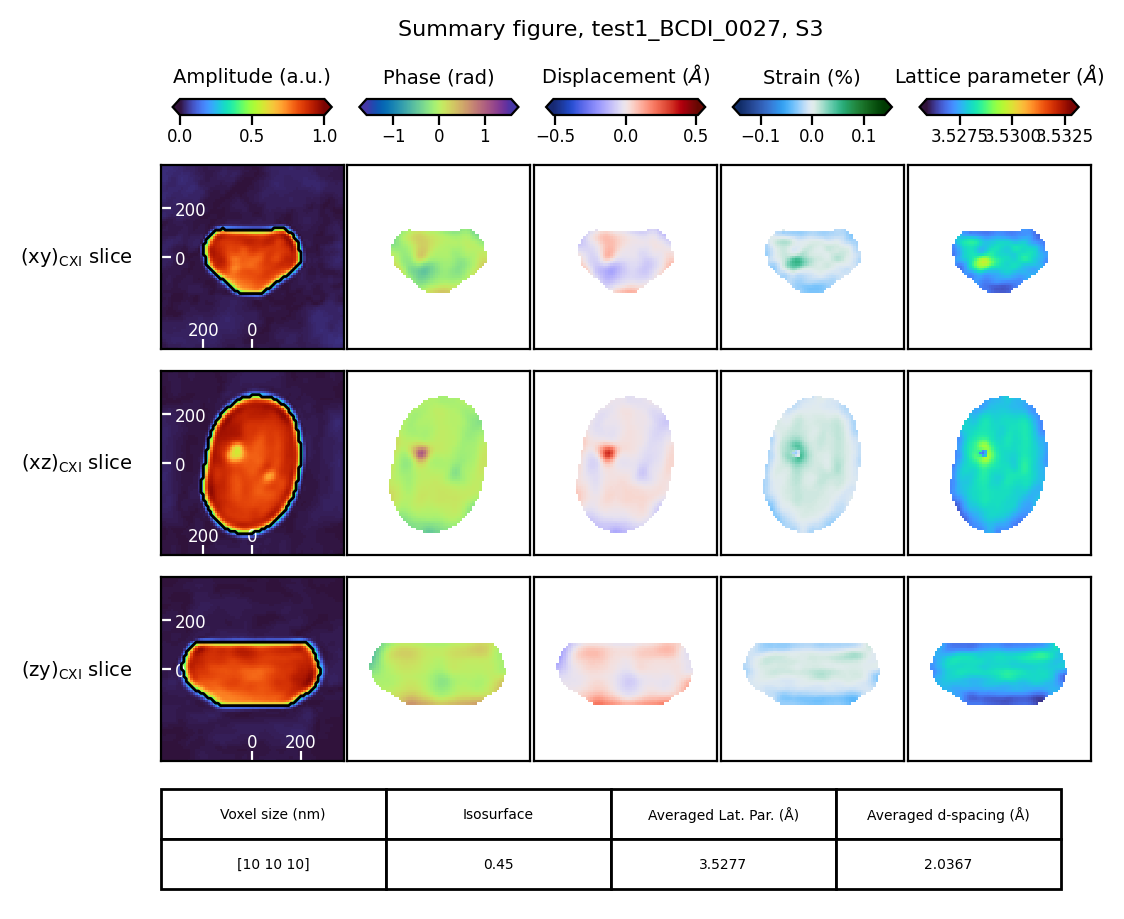

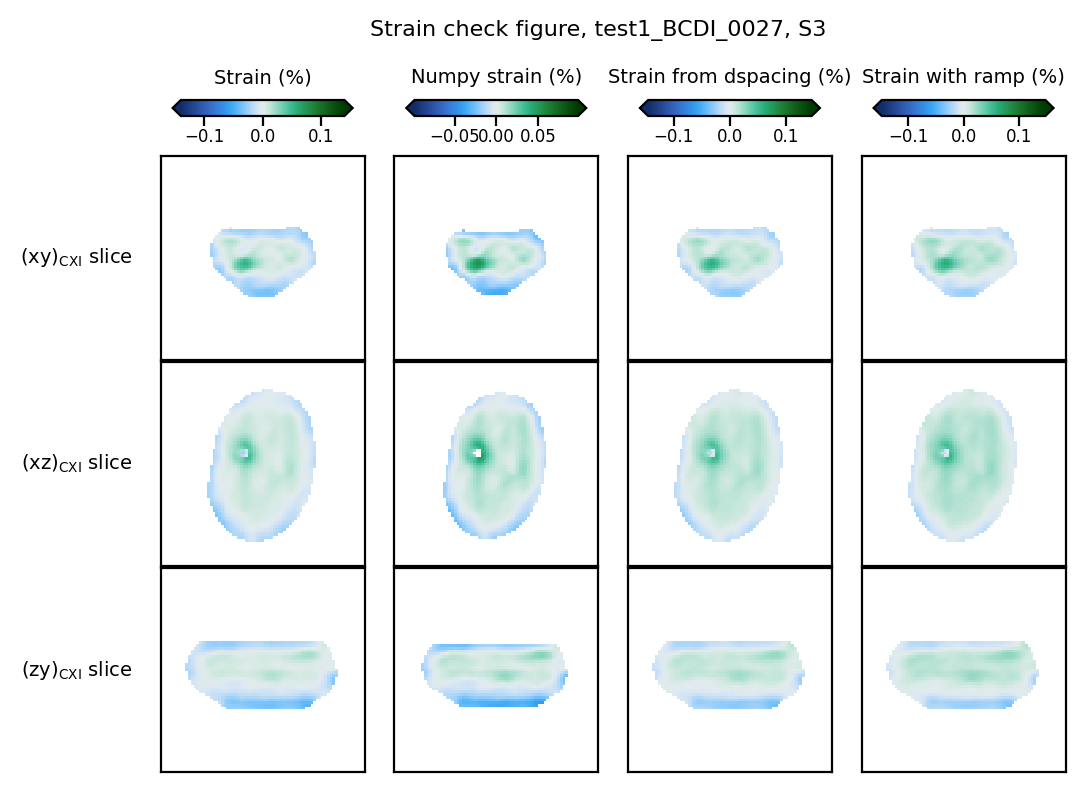

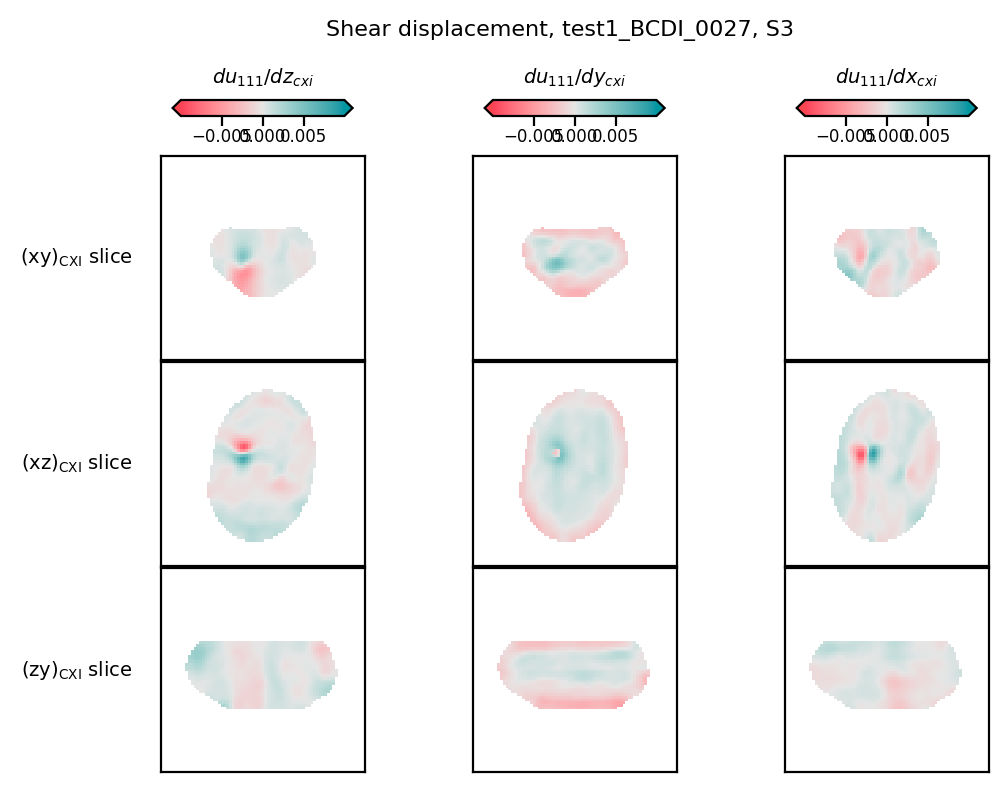

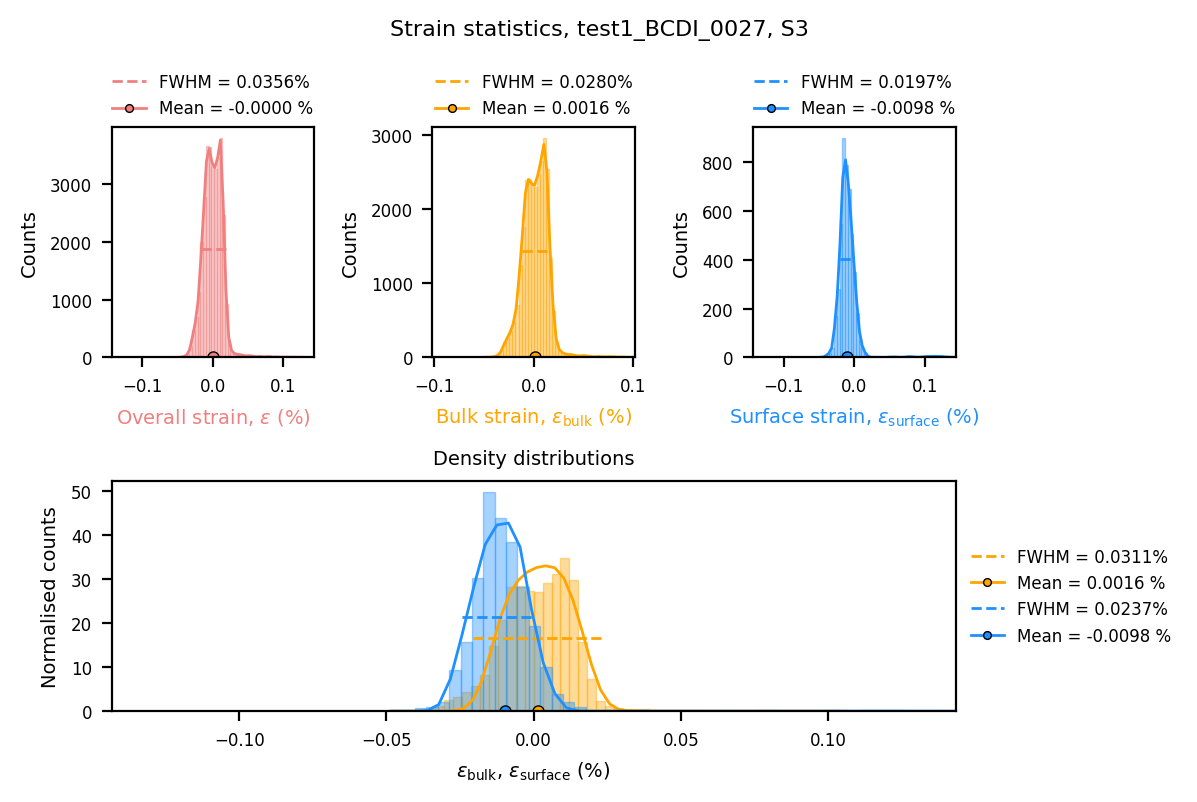

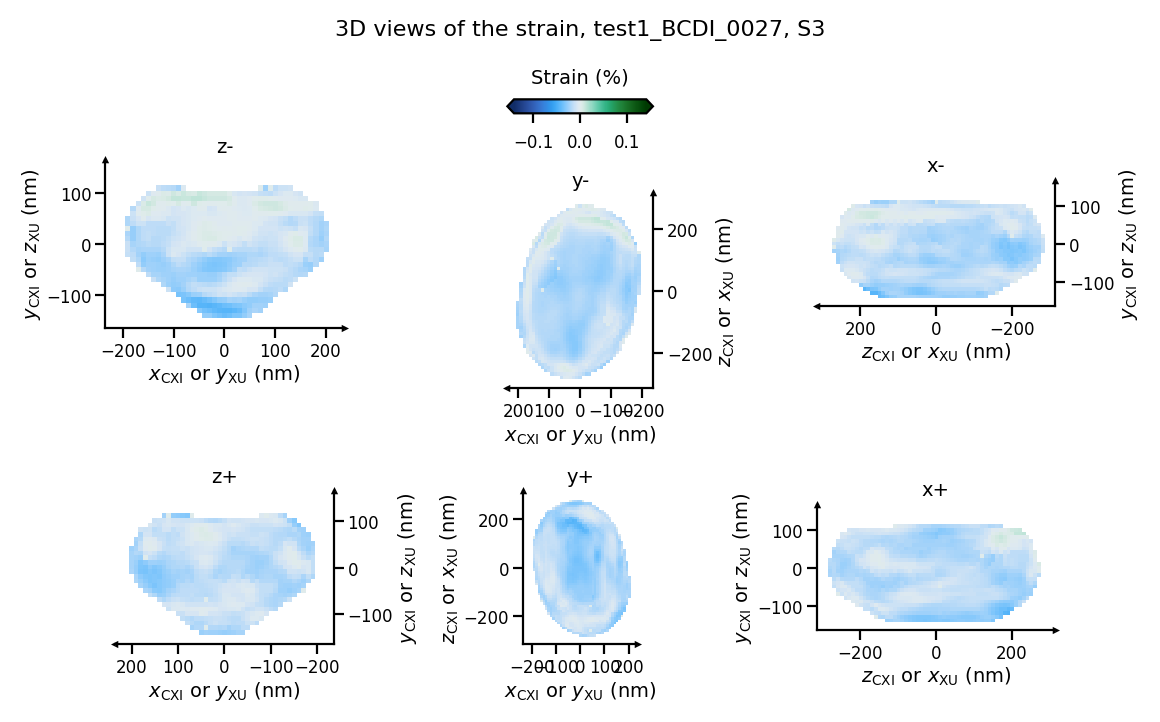

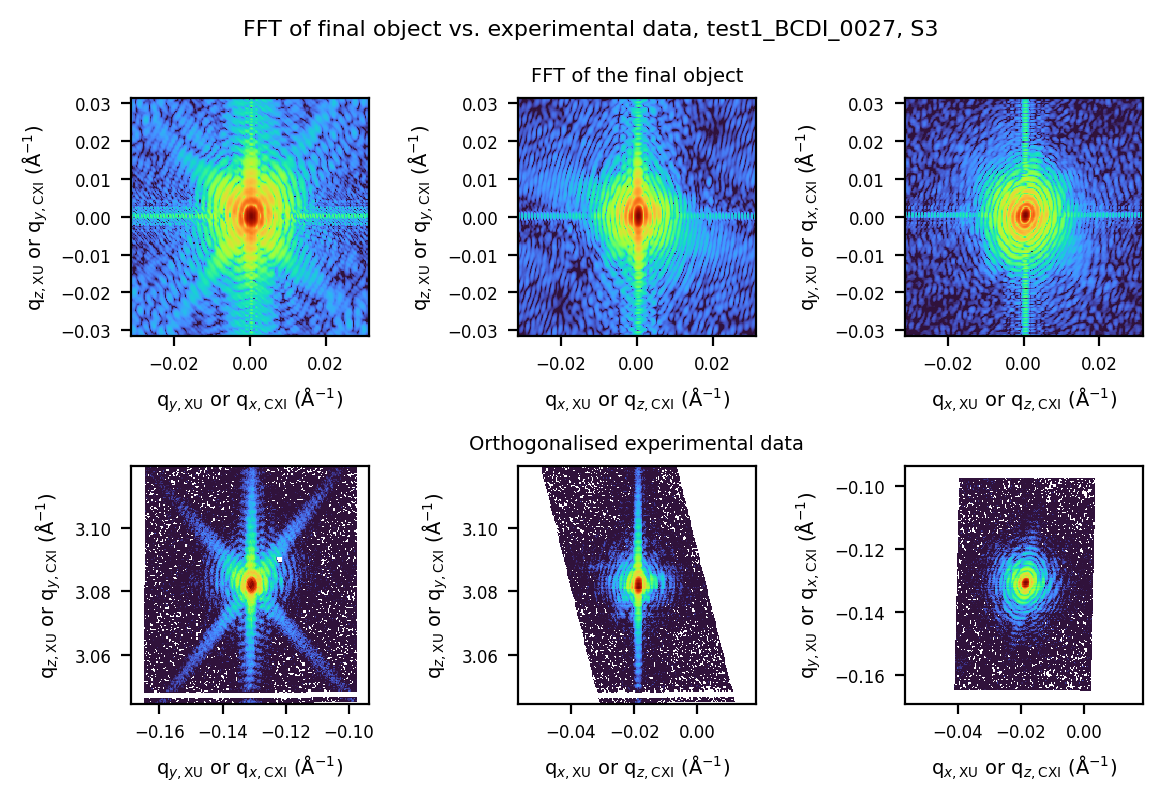

In [ ]:
bcdi_pipeline.postprocess(isosurface=0.3, voxel_size=None, flip=False)

## Facet analysis: detection and indexing

The facet analysis requires having run the post-processing with the 
parameter `method_det_support` different from None (default behaviour). 
You can set it to `"Isosurface"` or `"Amplitude_variation"`. The latter
allows to determine the support via deriving the reconstructed
amplitude.
Ex.:
```
bcdi_pipeline.params["cdiutils"].update(
    {
        "method_det_support": "Isosurface",  
        "order_of_derivative": "Gradient",  # or "Laplacian"
        "raw_process" : True,
    }
)
```

In [ ]:

bcdi_pipeline.params["cdiutils"].update(
    {
        "nb_facets": 26, # Expected number of facets of the particle
        "remove_edges": True,
        "nb_nghbs_min": 0,
        "authorized_index": ["max", 1],  # ['max',n],['absolute',a,b,c,...] or ['families',[h1,k1,l1],[h2,k2,l2],...]
        "index_to_display": [[1,1,1]],  # None for the top facet or [[h1,k1,l1],[h2,k2,l2],...]
        "display_f_e_c": "facet",  # 'facet', 'edge', 'corner', or 'all'
        "size": 10  # Size of the voxels in the post-processing
    }
)

bcdi_pipeline.facet_analysis()